<a href="https://colab.research.google.com/github/Akhila-Gururaj/Akhila-Gururaj/blob/main/Loan_payback_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df1= pd.read_csv("/content/loan.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


case1: person with high income will get loan


In [53]:
approved = df1[df1['Loan_Status']== 'Y' ]['ApplicantIncome']
rejected = df1[df1['Loan_Status']== 'N']['ApplicantIncome']

In [7]:
approved.mean()

5384.068720379147

In [8]:
rejected.mean()

5446.078125

rejected mean>approved mean. thus income is not only factor for the sanction of loan

In [54]:
from scipy.stats import ttest_ind
ttest_ind(approved,rejected)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)


H0 : both the average values are same
H1 : they are different
alpha = 0.05

pvalue > alpha and we accept H0

thus proved income is not only factor for the sanction of loan

dividing the income of the applicant into bins

In [55]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']



In [56]:
df1['Income_bin'] = pd.cut(df1['ApplicantIncome'],bins, labels = group)



In [57]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


<Axes: xlabel='Income_bin', ylabel='count'>

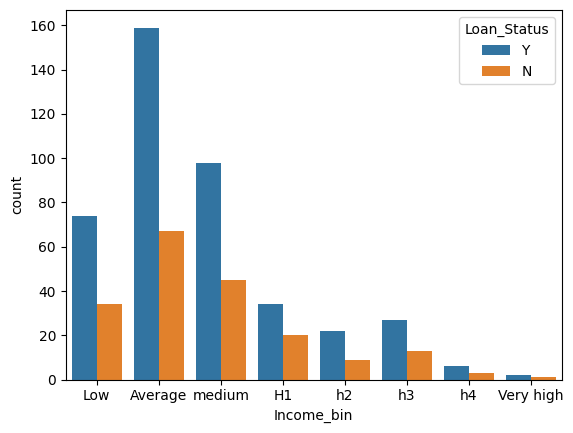

In [58]:
sns.countplot(x= df1['Income_bin'],hue = df1['Loan_Status'])



In [59]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df1['Income_bin'],df1['Loan_Status']))


Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

alpha: 0.05
Since p-value is high, null will fly. We fail to reject null.
Income bin and loan status doesn't follow any kind of dependency. They are independent.

In [61]:
df1['Loan_Amount_Term']= df1['Loan_Amount_Term']/12
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium


<Axes: >

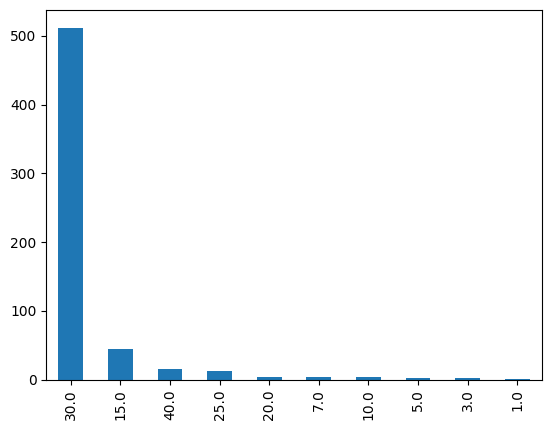

In [62]:
df1['Loan_Amount_Term'].value_counts().plot(kind='bar')

In [63]:
df1['Loan_EMI'] = df1['LoanAmount']/df1['Loan_Amount_Term']
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000


In [64]:
df1['EMI']=df1['Loan_EMI']*1000/12
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_EMI,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667


In [65]:
df1['Able_to_Payback'] =   df1['ApplicantIncome']*0.2>df1['EMI']
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Loan_EMI,EMI,Able_to_Payback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN,NaN,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556,True
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667,True


<Axes: xlabel='Able_to_Payback', ylabel='count'>

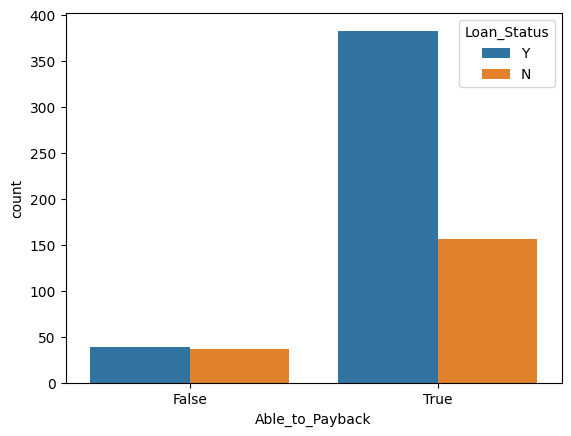

In [67]:
sns.countplot(x ='Able_to_Payback', data = df1, hue = 'Loan_Status')

In [69]:
chi2_contingency(pd.crosstab(df1['Able_to_Payback'], df1['Loan_Status']))

Chi2ContingencyResult(statistic=10.256894778987279, pvalue=0.0013617469727961193, dof=1, expected_freq=array([[ 23.45276873,  51.54723127],
       [168.54723127, 370.45276873]]))

alpha =0.025
pvalue < alpha, therefore
h0 rejected . Ability to py back and loan status are dependent.